## **Notebook PC1_Ativ3**
## Regularized ELM Classifier for the MNIST database.
**Professor:** Fernando J. Von Zuben <br>
**Aluno(a):** Caio Francisco Garcia de Lima **RA** 195210


In [ ]:
from keras.datasets import cifar10
import numpy as np
from keras.datasets import mnist

(Xp, y), (Xtp, yt) = cifar10.load_data()
Xa = Xp.reshape(Xp.shape[0], 3072)
Xta = Xtp.reshape(Xtp.shape[0], 3072)

y = y.ravel()
yt = yt.ravel()

X = Xa / 255.0
Xt = Xta / 255.0


170508288/170498071 [==============================] - 2s 0us/step


In [ ]:
# from matplotlib import pyplot as plt
# import numpy as np
# from keras.datasets import mnist

# # An alternative manner of accessing the MNIST database (now class 0 is the first one)
# (Xp, y), (Xtp, yt) = mnist.load_data()
# Xa = Xp.reshape(Xp.shape[0], 784)
# Xta = Xtp.reshape(Xtp.shape[0], 784)

# X = Xa / 255.0
# Xt = Xta / 255.0

# print("Shape of X: ".ljust(10),  X.shape)
# print("Shape of y: ".ljust(10),  y.shape)
# print("Shape of Xt: ".ljust(10),  Xt.shape)
# print("Shape of yt: ".ljust(10),  yt.shape)

11501568/11490434 [==============================] - 0s 0us/step
Shape of X:  (60000, 784)
Shape of y:  (60000,)
Shape of Xt:  (10000, 784)
Shape of yt:  (10000,)


In [ ]:
from tensorflow.keras.utils import to_categorical

yy = to_categorical(y)
yyt = to_categorical(yt)
sum_along_columns1 = np.sum(yy, axis = 0)
print(sum_along_columns1)
sum_along_columns2 = np.sum(yyt, axis = 0)
print(sum_along_columns2)

[5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000. 5000.]
[1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000. 1000.]


In [ ]:
partition = 0.7

# Mixing the dataset before partitioning
index = np.arange(0,X.shape[0])
np.random.shuffle(index)

training_set_size = int(X.shape[0] * partition)

index_training = index[:training_set_size]
index_validation = index[training_set_size:]


X_training = X[index_training]
y_training = yy[index_training]

X_validation = X[index_validation]
y_validation = yy[index_validation]

# ELM X
# We will concatenate a column of 1's to account for the V0 of each hidden neuron later on
X_training_elm = np.concatenate((np.transpose(np.array([np.ones(X_training.shape[0])])), X_training), axis=1)
X_validation_elm = np.concatenate((np.transpose(np.array([np.ones(X_validation.shape[0])])), X_validation), axis=1)

print("X_training:".ljust(20), X_training.shape)
print("y_training:".ljust(20), y_training.shape)

print("X_validation:".ljust(20), X_validation.shape)
print("y_validation:".ljust(20), y_validation.shape)

print("X_training_elm:".ljust(20), X_training_elm.shape)
print("X_validation_elm:".ljust(20), X_validation_elm.shape)

X_training:          (35000, 3072)
y_training:          (35000, 10)
X_validation:        (15000, 3072)
y_validation:        (15000, 10)
X_training_elm:      (35000, 3073)
X_validation_elm:    (15000, 3073)


In [ ]:
def get_class_from_sample(sample: np.ndarray):
    class_ = 1
    for i in sample:
        if i == 0:
            class_ += 1
        else:
            break
    return class_ 

In [ ]:
def leaky_relu(table):
    return np.where(table > 0, table,  0.02 * table)

def relu(table):
    return np.where(table > 0, table,  0)

def get_h(X, V, activation_function): 
    V_ = np.matmul(X, V)
    return activation_function(V_)

def get_w(X, y, c): 
    w_1 = (np.matmul(np.transpose(X), X) + c * np.eye(X.shape[1]))
    w_2 = np.matmul(np.transpose(X), y)
    w,resid,rank,s = np.linalg.lstsq(w_1, w_2, rcond=None)
    return w

In [ ]:
def get_rates_from_c_values(X, y, c_values, Ws = []):
    hit_rates = []
    
    if len(Ws) != 0:
        are_Ws_given = True
    else:
        are_Ws_given = False
        Ws = []

    for index, c in enumerate(c_values):
        print(c)
        
        if are_Ws_given:
            W = Ws[index]
        else:
            W = get_w(X, y, c)
            Ws.append(W)

        y_estimate = np.matmul(X,W)
        hits = 0
        for index, estimate in enumerate(y_estimate):
            max_index = np.where(estimate == np.amax(estimate))[0][0]
            estimated_class = max_index + 1
            if estimated_class == get_class_from_sample(y[index]):
                hits += 1
        hit_rates.append(hits/y_estimate.shape[0])
    return hit_rates, Ws

In [ ]:
# Standard deviation of the random weight generation at the hidden layer
sigma = 0.2
# Number of inputs for the MNIST dataset: 785
# Number of inputs for the CIFAR10 dataset: 3073
# Take 1000 hidden neurons for the MNIST dataset and 2000 for the CIFAR10 dataset.
V  = sigma * np.random.randn(3073, 2000)

**a) Execute o notebook [PC1_Ativ3_ELM_MNIST.ipynb] fornecido pelo
professor, que considera 1000 neurônios na camada intermediária. O intervalo
de excursão da busca (um pouco distinto daquele da Atividade 1) está
adequado? Justifique sua resposta. Caso não esteja, faça modificações
pertinentes até encontrar um bom intervalo de busca.**


<p align="justify">O intervalo não está adequado, pois não hávia nenhum pico então o resultado ótimo não estava no intervalo, é necessário identificar o comportamento de súbida e descida da curva para garantir que o melhor resultado foi contemplado. O intervalo foi ajustado, aumentando os valores da potência de 2 tanto para direita.</p>

In [ ]:
c_values = [pow(2,d) for d in range(-16, 48, 2)]
hit_rates_training, Ws = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, c_values)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944
1099511627776
4398046511104
17592186044416
70368744177664


In [ ]:
hit_rates_validation, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, c_values, Ws)

1.52587890625e-05
6.103515625e-05
0.000244140625
0.0009765625
0.00390625
0.015625
0.0625
0.25
1
4
16
64
256
1024
4096
16384
65536
262144
1048576
4194304
16777216
67108864
268435456
1073741824
4294967296
17179869184
68719476736
274877906944
1099511627776
4398046511104
17592186044416
70368744177664


Best c value: 64 
Performance of this value: 0.9372222222222222


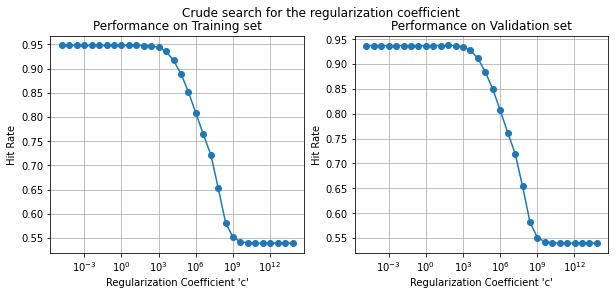

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Crude search for the regularization coefficient")
axs[0].semilogx(c_values, hit_rates_training, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].semilogx(c_values, hit_rates_validation, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation == np.amax(hit_rates_validation))[0][0]

best_c = c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation[best_c_index]))


In [ ]:
step =  0.1 * (4 * best_c - best_c / 4);

fine_c_values = np.arange((best_c/4), (8*best_c) + step / 10, step)

hit_rates_training_fine, Ws_fine = get_rates_from_c_values(get_h(X_training_elm, V, relu), y_training, fine_c_values)

16.0
40.0
64.0
88.0
112.0
136.0
160.0
184.0
208.0
232.0
256.0
280.0
304.0
328.0
352.0
376.0
400.0
424.0
448.0
472.0
496.0


In [ ]:
hit_rates_validation_fine, _ = get_rates_from_c_values(get_h(X_validation_elm, V, relu), y_validation, fine_c_values, Ws_fine)

16.0
40.0
64.0
88.0
112.0
136.0
160.0
184.0
208.0
232.0
256.0
280.0
304.0
328.0
352.0
376.0
400.0
424.0
448.0
472.0
496.0


### Base CIFAR-10
**c) Na célula de código que define a matriz V, use dimensões 3073 × 2000. O
intervalo de excursão da busca está adequado? Justifique sua resposta. Caso
não esteja, faça modificações pertinentes até encontrar um bom intervalo de
busca.**

<p align="justify"> O intervalo sugerido anterirormente para a busca grossa foi suficiente, porém foi necessário alterar o mesmo intervalo para a busca fina, afim de que se pudesse melhor observar a curva para essa base de dados.</p>

Best c value: 496.0 
Performance of this value: 0.4544


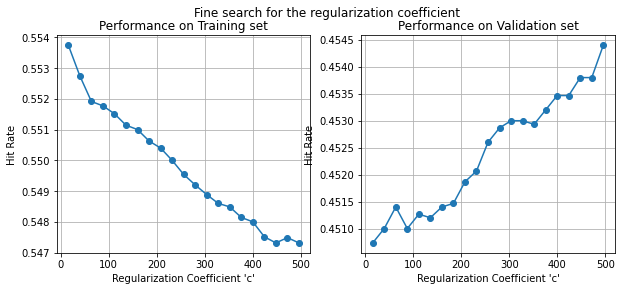

In [ ]:
fig, axs = plt.subplots(1, 2)
fig.set_figwidth(10)
fig.suptitle("Fine search for the regularization coefficient")
axs[0].plot(fine_c_values, hit_rates_training_fine, 'o-')
axs[0].set_title("Performance on Training set")
axs[0].set_ylabel("Hit Rate")
axs[0].set_xlabel("Regularization Coefficient 'c'")
axs[0].grid()

axs[1].plot(fine_c_values, hit_rates_validation_fine, 'o-')
axs[1].set_title("Performance on Validation set")
axs[1].set_ylabel("Hit Rate")
axs[1].set_xlabel("Regularization Coefficient 'c'")
axs[1].grid()

best_c_index = np.where(hit_rates_validation_fine == np.amax(hit_rates_validation_fine))[0][0]

best_c = fine_c_values[best_c_index]

print("Best c value: {} \nPerformance of this value: {}".format(best_c, hit_rates_validation_fine[best_c_index]))

In [ ]:
X_elm = np.concatenate((np.transpose(np.array([np.ones(X.shape[0])])), X), axis=1)
W_elm = get_w(get_h(X_elm, V, relu), yy, best_c)

**b) O que sustenta o ganho de desempenho na taxa de acerto de classificação
quando comparado ao classificador linear da Atividade 1? Repare que a
estratégia de otimização é a mesma nos dois casos.**

Sustenta-se no fato que a camada intermediária, que é aleatória, deixou o problema mais linear, facilitando sua solução por hiperplanos. Vale a pena reforçar que a camada intermediária tem o papel de linearzir o problema.



In [ ]:
Xt_elm = np.concatenate((np.transpose(np.array([np.ones(Xt.shape[0])])), Xt), axis=1)
yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
hits = 0
confusion_matrix = np.zeros([10, 10], dtype=int)
for index, estimate in enumerate(yt_estimate):
    max_index = np.where(estimate == np.amax(estimate))[0][0]
    estimated_class = max_index + 1
    if estimated_class == get_class_from_sample(yyt[index,:]):
        hits += 1
        confusion_matrix[estimated_class-1][estimated_class-1] += 1
    else:
        confusion_matrix[estimated_class-1][get_class_from_sample(yyt[index,:])-1] += 1

print("Performance on test set: {}".format(hits/yt_estimate.shape[0]))
print(confusion_matrix)

Performance on test set: 0.4656
[[550  45 126  48  69  39  12  44 109  48]
 [ 38 585  42  69  26  37  39  57  66 190]
 [ 49  13 295  80 132  77  71  40   7  13]
 [ 17  14  70 236  41 142  62  51  13  25]
 [ 21   8 119  46 369  74 102  77  13   8]
 [ 13  18  71 196  53 350  52  62  18  20]
 [ 30  39 134 142 150 100 573  38  18  39]
 [ 41  45  75  68  97  97  39 513  21  52]
 [184  73  39  46  37  47  24  38 672  92]
 [ 57 160  29  69  26  37  26  80  63 513]]


Image no. 1


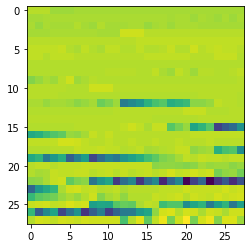

Real: 8
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.10371702  0.27259245  0.04792088 -0.0241593   0.00076283 -0.07641379
 -0.06643953 -0.23053406  0.47892466  0.49753221] 

Image no. 3


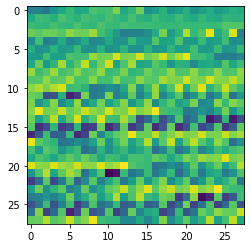

Real: 0
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.2073337   0.11987692  0.14153691  0.09766137  0.08780034 -0.0789004
 -0.10997687  0.10772289  0.22660586  0.13925754] 

Image no. 4


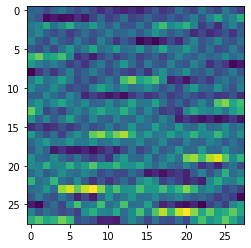

Real: 6
Predicted: 4
Rank of the correct answer: 5
Probabilities: [-0.15397301  0.17432261  0.19621112  0.01941267  0.31279911  0.07034637
  0.17269631 -0.02479437  0.17360447  0.03526756] 

Image no. 6


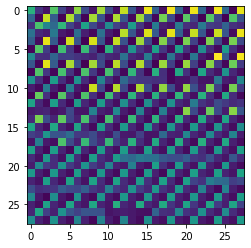

Real: 1
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.33433122  0.3761157   0.01860174  0.40983522  0.00330773  0.25854517
  0.12489446 -0.26591547 -0.39863768  0.1742966 ] 

Image no. 8


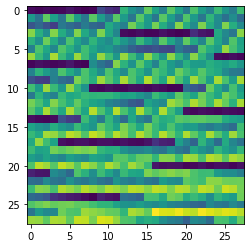

Real: 3
Predicted: 5
Rank of the correct answer: 3
Probabilities: [ 0.0522932   0.06856771  0.22498035  0.19286394  0.17056665  0.23524265
  0.13520148  0.10751426  0.02018015 -0.08104787] 

Image no. 16


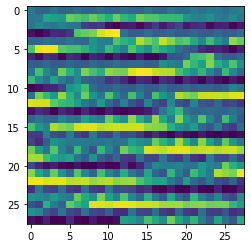

Real: 5
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.15729244  0.25101593 -0.02618872  0.08520893 -0.12591073  0.28526463
  0.01289218  0.28552925  0.02953539 -0.01807662] 

Image no. 17


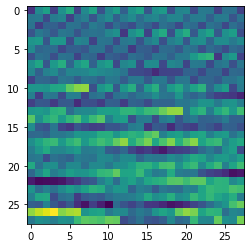

Real: 7
Predicted: 0
Rank of the correct answer: 7
Probabilities: [ 0.27677252  0.05589344  0.00243944  0.24053165  0.01652173  0.10221084
  0.19835751  0.04966277 -0.0051031   0.11869867] 

Image no. 20


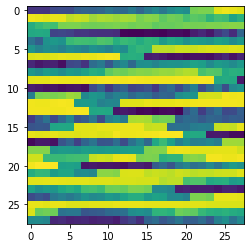

Real: 7
Predicted: 1
Rank of the correct answer: 2
Probabilities: [ 0.21370834  0.23679103 -0.01365622  0.04199848  0.13341526  0.10951624
  0.14112617  0.22697365 -0.0105201  -0.00162967] 

Image no. 22


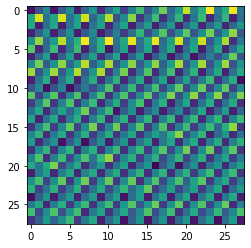

Real: 4
Predicted: 0
Rank of the correct answer: 3
Probabilities: [ 0.49192176  0.01537324  0.18680327 -0.02799294  0.12819508 -0.0040519
  0.04848688  0.01170952  0.05636758 -0.00871882] 

Image no. 24


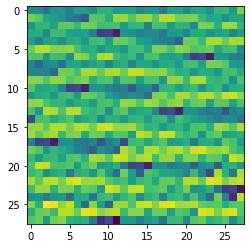

Real: 5
Predicted: 4
Rank of the correct answer: 3
Probabilities: [ 0.04632089  0.00642087  0.26083345  0.04910226  0.34172057  0.15593992
 -0.02033282  0.1219331   0.0586822  -0.04116252] 

Image no. 25


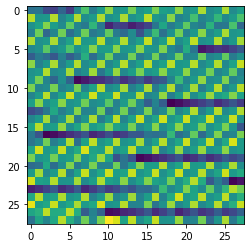

Real: 2
Predicted: 6
Rank of the correct answer: 6
Probabilities: [ 0.10538334  0.15681128  0.11421898 -0.05308197  0.15807963  0.12163392
  0.26574802 -0.00721326  0.20842452 -0.07524722] 

Image no. 26


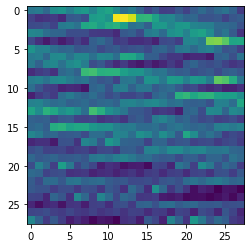

Real: 4
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.10530644  0.17535496  0.11685192  0.27433288  0.22740706  0.02977713
  0.22033391  0.0343433  -0.17360727  0.06598933] 

Image no. 27


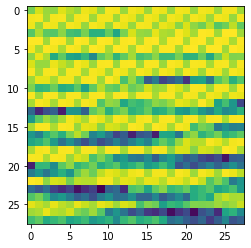

Real: 0
Predicted: 7
Rank of the correct answer: 2
Probabilities: [0.23526862 0.14857297 0.08296845 0.01250625 0.04217939 0.01245617
 0.04897958 0.3597411  0.02423702 0.06781617] 

Image no. 31


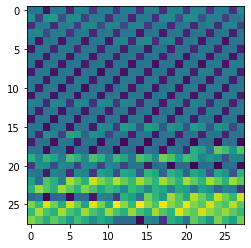

Real: 5
Predicted: 2
Rank of the correct answer: 3
Probabilities: [ 0.07658196 -0.06336792  0.25732686  0.04488061  0.24677006  0.22830777
  0.06011183  0.10705777  0.06549577  0.00062829] 

Image no. 32


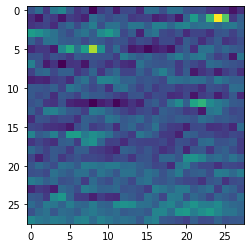

Real: 4
Predicted: 2
Rank of the correct answer: 4
Probabilities: [ 0.09380767 -0.12734066  0.25793691  0.10667366  0.14944507  0.07283855
  0.17344535  0.10726673  0.1972733  -0.03235191] 

Image no. 35


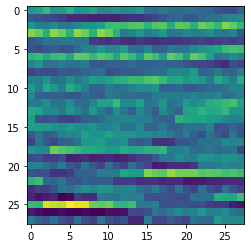

Real: 2
Predicted: 1
Rank of the correct answer: 6
Probabilities: [ 0.03324623  0.37272535  0.09584028  0.1271173   0.2054333  -0.06258783
  0.19592203 -0.03198035  0.14497239  0.02004974] 

Image no. 36


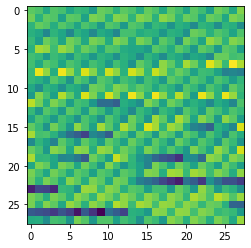

Real: 4
Predicted: 2
Rank of the correct answer: 3
Probabilities: [-0.08738863  0.06966142  0.23605915  0.09606153  0.18804245  0.07210658
  0.23264758  0.18372601  0.07345564 -0.00555424] 

Image no. 37


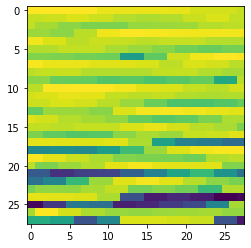

Real: 1
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.12569727  0.28766838 -0.18934301 -0.09161771 -0.00244617 -0.01290604
 -0.05625906 -0.18662328  0.29094269  0.71340272] 

Image no. 38


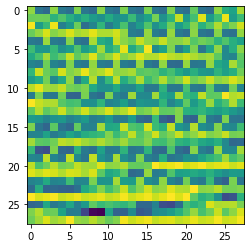

Real: 9
Predicted: 1
Rank of the correct answer: 7
Probabilities: [0.05684573 0.27376719 0.0678259  0.15775363 0.17426473 0.02947719
 0.00318129 0.08535201 0.00514746 0.04981391] 

Image no. 42


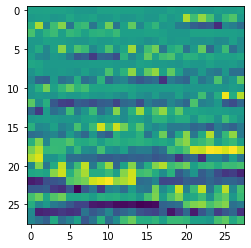

Real: 5
Predicted: 9
Rank of the correct answer: 4
Probabilities: [-0.0173902  -0.02630765  0.10504466  0.34466882 -0.10516816  0.1076209
 -0.1497459   0.27310477 -0.08156955  0.36356175] 

Image no. 46


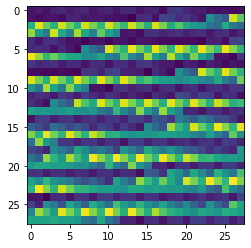

Real: 3
Predicted: 5
Rank of the correct answer: 2
Probabilities: [-0.07625786  0.11554197  0.0819101   0.26547088  0.12165247  0.29585574
  0.16275445 -0.03514963  0.0617845   0.0518871 ] 

Image no. 48


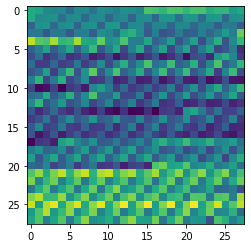

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.02993309 -0.04878902  0.10189838  0.01193951  0.44023383  0.01813678
  0.09083819  0.28546046  0.05764211  0.00370291] 

Image no. 52


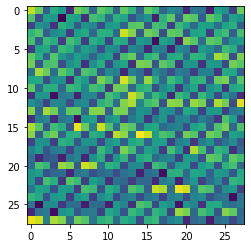

Real: 0
Predicted: 6
Rank of the correct answer: 6
Probabilities: [ 0.07423413  0.24752214  0.09841747  0.09102947 -0.00999083 -0.04553044
  0.38877035 -0.00347615  0.12736529 -0.04229187] 

Image no. 53


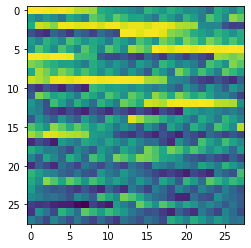

Real: 3
Predicted: 9
Rank of the correct answer: 3
Probabilities: [-0.00336575  0.05525937  0.04640098  0.21628945  0.03501864  0.21851634
  0.08770179  0.14520039 -0.07662408  0.2497822 ] 

Image no. 56


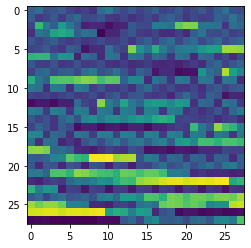

Real: 7
Predicted: 5
Rank of the correct answer: 2
Probabilities: [-0.02141068 -0.00905144  0.04653077  0.04111603 -0.06508722  0.4226756
 -0.10166357  0.35987885  0.02536378  0.24102761] 

Image no. 57


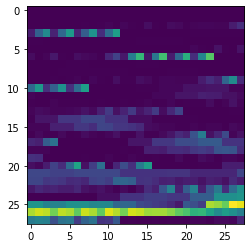

Real: 7
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.14227903  0.13037572 -0.02852816 -0.00388332  0.08743315 -0.02049822
  0.26913634  0.15081219  0.13245579  0.11274967] 

Image no. 58


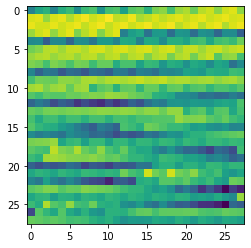

Real: 4
Predicted: 3
Rank of the correct answer: 7
Probabilities: [0.0129466  0.06878768 0.0902012  0.18945806 0.07762905 0.11415037
 0.07025916 0.12940003 0.091409   0.13219037] 

Image no. 59


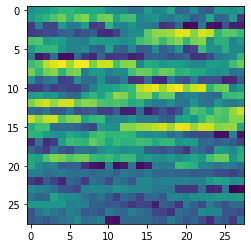

Real: 6
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.13286428 -0.0393971   0.25288151  0.15759393  0.19960284  0.12429434
  0.21530635 -0.07676093  0.07465353  0.02726995] 

Image no. 60


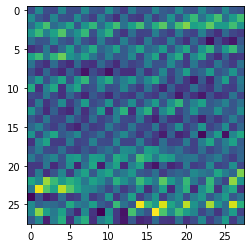

Real: 7
Predicted: 4
Rank of the correct answer: 2
Probabilities: [-0.02787388 -0.08094352  0.25494848 -0.08213639  0.3636302   0.01723963
  0.20616407  0.34072506 -0.00266597  0.01092919] 

Image no. 63


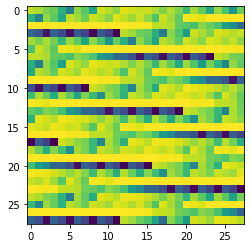

Real: 3
Predicted: 9
Rank of the correct answer: 8
Probabilities: [-0.13070718  0.19753425  0.04257889  0.0375437   0.13969869  0.06518913
  0.11008265 -0.0368536   0.21339346  0.45640012] 

Image no. 65


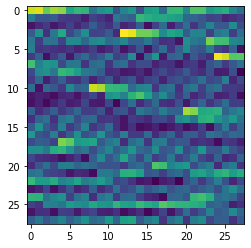

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [-0.01909881  0.05659161  0.21253264  0.04768598  0.1114465   0.13704016
  0.22014719  0.1953544   0.08819597 -0.01356464] 

Image no. 67


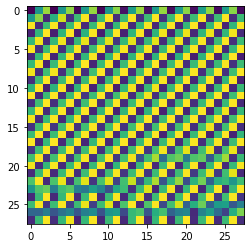

Real: 2
Predicted: 8
Rank of the correct answer: 3
Probabilities: [ 0.34824933 -0.25198851  0.30968231 -0.020812   -0.02300353 -0.05164691
  0.16420406  0.21819785  0.44011175 -0.09180419] 

Image no. 68


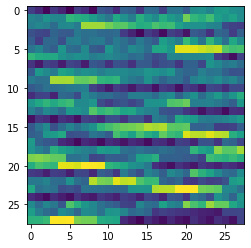

Real: 3
Predicted: 9
Rank of the correct answer: 3
Probabilities: [-0.22386289  0.11155727  0.08413785  0.29517199 -0.06080859  0.31541827
  0.03813719  0.04879815 -0.11215697  0.3715931 ] 

Image no. 69


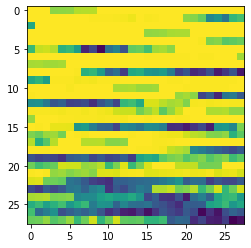

Real: 7
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.14735808  0.28453929 -0.01573047 -0.03794757 -0.00890388  0.10391724
 -0.09546367  0.19732484 -0.17539548  0.46102549] 

Image no. 70


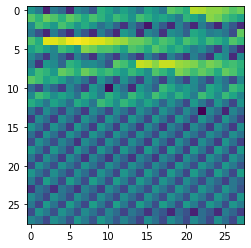

Real: 2
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.19383102 -0.05456401  0.23017298  0.09094146  0.2515101   0.08651734
  0.10959651  0.00410006  0.11281374 -0.04971142] 

Image no. 71


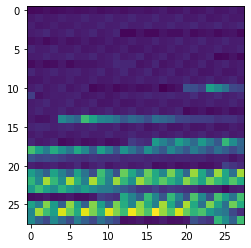

Real: 6
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.07629637  0.00219867  0.02133653  0.15169947  0.09014637  0.17514529
  0.18889748  0.25328445 -0.00032719  0.02955297] 

Image no. 74


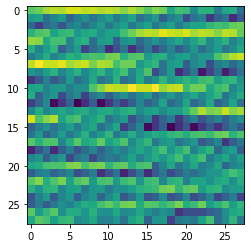

Real: 0
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.23007399  0.00846165  0.01758216 -0.06927513  0.15948181 -0.00698787
  0.07689333  0.16834047  0.13097418  0.23102724] 

Image no. 83


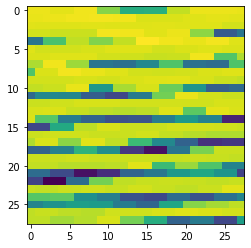

Real: 7
Predicted: 0
Rank of the correct answer: 9
Probabilities: [ 0.28290861 -0.09191173  0.21578205  0.16593354  0.07205413  0.10635762
  0.04689155  0.02526978  0.18682859  0.07358228] 

Image no. 85


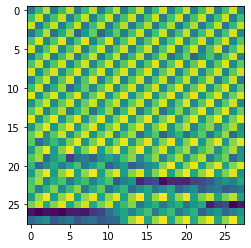

Real: 5
Predicted: 7
Rank of the correct answer: 9
Probabilities: [ 0.13741001 -0.04094493  0.06842357  0.02153579  0.07699287 -0.00434208
  0.03203409  0.36132886  0.1489681   0.24265056] 

Image no. 86


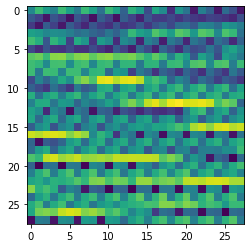

Real: 2
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.10199099  0.07428786  0.17559859  0.4320093   0.09232001  0.0397065
  0.04919715 -0.13900465  0.02637048  0.14633843] 

Image no. 87


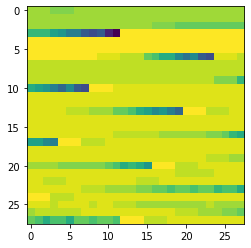

Real: 7
Predicted: 8
Rank of the correct answer: 8
Probabilities: [ 0.19522115  0.06281478  0.00438737  0.01566531  0.08378189  0.09740738
 -0.07042554  0.00531666  0.48822987  0.13105895] 

Image no. 89


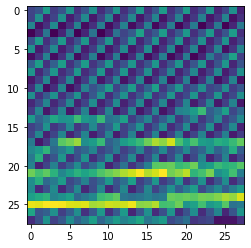

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.21828066  0.10513057 -0.0425014   0.00511996  0.09954555  0.00985405
 -0.02198658  0.00309281  0.31700166  0.29562926] 

Image no. 91


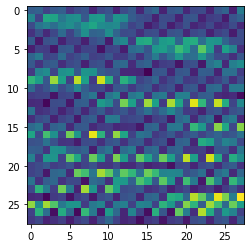

Real: 3
Predicted: 5
Rank of the correct answer: 5
Probabilities: [ 0.0353051  -0.13197515  0.14425415  0.11928249  0.24949017  0.25973282
  0.17773377  0.02097056 -0.05927103  0.03870013] 

Image no. 95


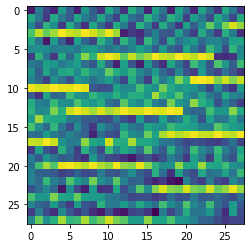

Real: 6
Predicted: 2
Rank of the correct answer: 8
Probabilities: [-0.03759321 -0.01329553  0.2823855   0.18037685  0.02674247  0.12743602
  0.01823718  0.1869579   0.12355968  0.13729186] 

Image no. 99


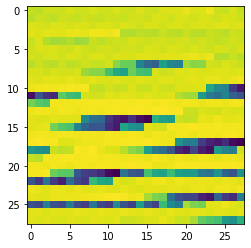

Real: 7
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.01548753 -0.04960014  0.07320349  0.22976445 -0.03195938  0.12865797
 -0.03416462  0.36464373 -0.04290837  0.38332114] 

Image no. 100


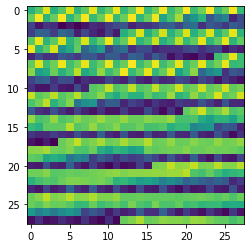

Real: 4
Predicted: 5
Rank of the correct answer: 2
Probabilities: [ 0.08639914  0.06567051  0.13292043  0.17272278  0.19065141  0.21380044
  0.12286718  0.09860244 -0.03963378  0.01456318] 

Image no. 101


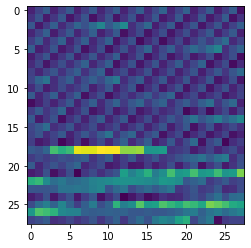

Real: 5
Predicted: 4
Rank of the correct answer: 7
Probabilities: [ 0.13326714  0.18750899  0.08076537 -0.00150682  0.27414319  0.07824255
  0.05069565  0.17732514 -0.05501091  0.08418013] 

Image no. 106


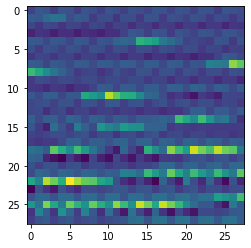

Real: 3
Predicted: 6
Rank of the correct answer: 5
Probabilities: [ 0.06310838  0.09050426 -0.04518634  0.07317346  0.04743074  0.2007646
  0.26616681  0.00588382  0.21802556  0.03469157] 

Image no. 109


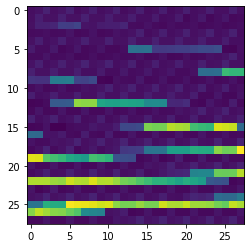

Real: 7
Predicted: 5
Rank of the correct answer: 5
Probabilities: [ 0.17071861 -0.04377442 -0.06445294  0.17687879 -0.101735    0.4633975
  0.10261307  0.14047256  0.05404114  0.14830404] 

Image no. 110


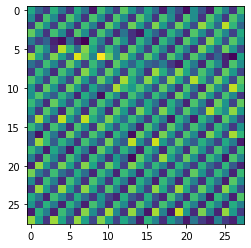

Real: 4
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.10710625  0.13547392  0.10177291  0.10641997  0.22065672  0.02821924
  0.38905101  0.02758031 -0.10508813  0.04382852] 

Image no. 111


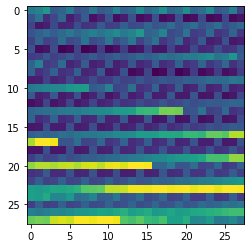

Real: 0
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.32337093  0.09721804  0.36016746  0.1441062   0.17699986  0.13527311
 -0.02610538  0.04587695 -0.12900582 -0.02646937] 

Image no. 112


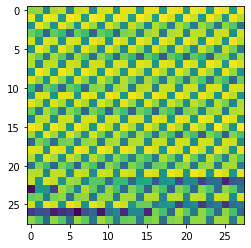

Real: 6
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.04267586  0.03674688  0.41420825  0.04795325  0.2312838   0.00255482
  0.34041498 -0.10832605 -0.02190034 -0.03845899] 

Image no. 114


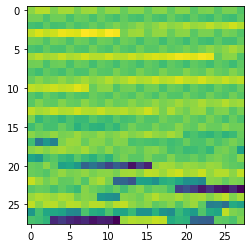

Real: 1
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.08112553  0.40857488 -0.17018215 -0.05755454 -0.00742631  0.05403245
 -0.05859872  0.25228871 -0.10257217  0.48810948] 

Image no. 115


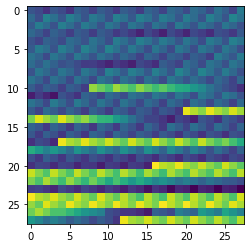

Real: 3
Predicted: 1
Rank of the correct answer: 2
Probabilities: [0.03454267 0.18786636 0.04393203 0.15135589 0.09219932 0.08800724
 0.12751779 0.00086326 0.13137999 0.06304367] 

Image no. 117


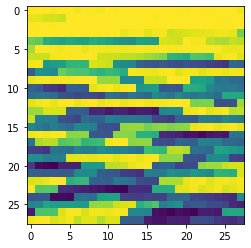

Real: 4
Predicted: 9
Rank of the correct answer: 9
Probabilities: [0.16184715 0.00806512 0.1872116  0.10879752 0.06616158 0.13645064
 0.11869912 0.07211223 0.08068151 0.23318741] 

Image no. 119


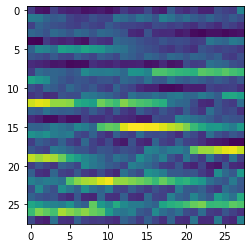

Real: 7
Predicted: 5
Rank of the correct answer: 7
Probabilities: [-0.02649508  0.32455148  0.06434784  0.00252412  0.1424403   0.5075716
 -0.07787715 -0.01993654 -0.14568101  0.21600501] 

Image no. 121


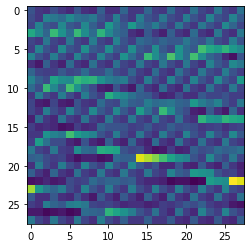

Real: 3
Predicted: 4
Rank of the correct answer: 3
Probabilities: [-3.93960828e-02 -6.98146824e-03  5.91104738e-02  1.90111383e-01
  3.87800972e-01  6.54808831e-02 -2.64299664e-03  2.42314866e-01
 -5.97150804e-05  2.80855938e-02] 

Image no. 122


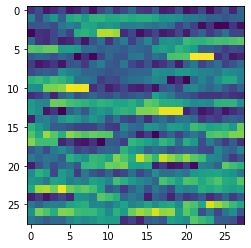

Real: 1
Predicted: 9
Rank of the correct answer: 2
Probabilities: [ 0.04428805  0.2385874   0.06682403 -0.06674859 -0.01292787  0.06115816
  0.07965211  0.13214579  0.11998518  0.25611437] 

Image no. 123


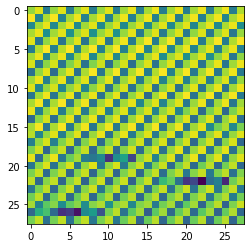

Real: 2
Predicted: 7
Rank of the correct answer: 2
Probabilities: [-0.02330904  0.00416993  0.32520951  0.05115504  0.16782781  0.02232011
  0.07757763  0.38978271 -0.02797659 -0.02339889] 

Image no. 124


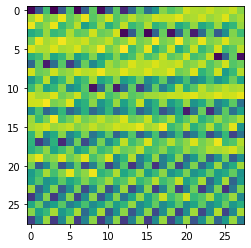

Real: 8
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.38274595  0.0787018   0.0400661   0.005727    0.03770525 -0.06081178
 -0.05195376  0.08804291  0.2796156   0.15196484] 

Image no. 125


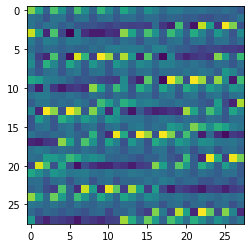

Real: 0
Predicted: 7
Rank of the correct answer: 5
Probabilities: [ 0.15927956  0.20794476  0.24273004  0.04030521 -0.01379821  0.01395023
  0.19197155  0.25698907 -0.01431065 -0.05934542] 

Image no. 128


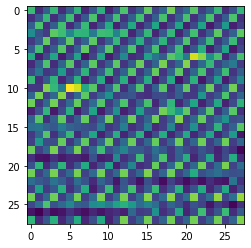

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.01110623  0.13363099  0.02372336  0.47523841  0.2374425   0.30455628
 -0.14464963  0.00921271  0.00621266 -0.13174095] 

Image no. 129


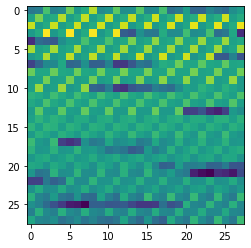

Real: 2
Predicted: 6
Rank of the correct answer: 5
Probabilities: [0.16529384 0.01710775 0.1438533  0.05958824 0.0141707  0.15846255
 0.17182719 0.02533218 0.04845564 0.14961054] 

Image no. 132


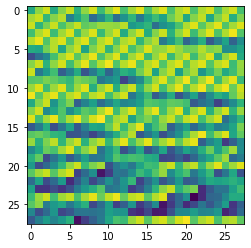

Real: 8
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.11587945  0.17543952 -0.0423093  -0.01795242  0.00230518  0.03469006
  0.07135256  0.06534811  0.14530258  0.44640266] 

Image no. 133


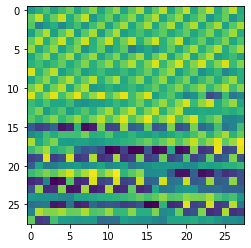

Real: 9
Predicted: 7
Rank of the correct answer: 2
Probabilities: [ 0.10051526  0.12219228 -0.22651995  0.23007378 -0.13049295  0.3211482
 -0.11028592  0.50632177 -0.24993422  0.35591284] 

Image no. 138


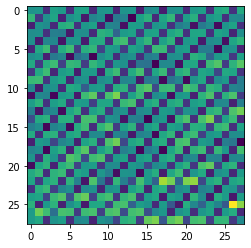

Real: 2
Predicted: 6
Rank of the correct answer: 2
Probabilities: [ 0.07374073 -0.05440793  0.34125624 -0.01958001  0.19096631  0.11132858
  0.41981776  0.05286202 -0.13074724 -0.00518489] 

Image no. 139


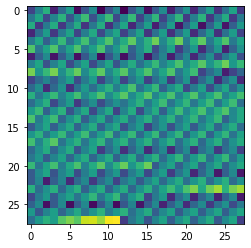

Real: 9
Predicted: 8
Rank of the correct answer: 4
Probabilities: [ 0.18832956  0.20762957 -0.01094282 -0.0149162   0.03957634 -0.01928179
  0.00736171  0.02667322  0.44689097  0.09334693] 

Image no. 140


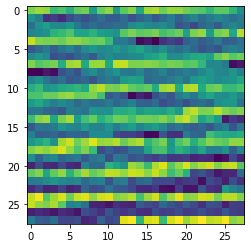

Real: 6
Predicted: 2
Rank of the correct answer: 3
Probabilities: [-0.01450244  0.14998836  0.31079479  0.13139873  0.23207915  0.03426591
  0.19671049 -0.00443724 -0.01119317  0.05086448] 

Image no. 143


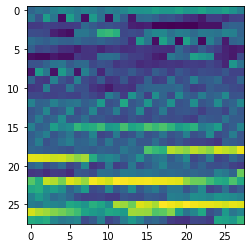

Real: 3
Predicted: 5
Rank of the correct answer: 9
Probabilities: [ 0.11300071  0.04074744  0.06060041  0.03561366 -0.07667492  0.22225503
  0.09151598  0.11087747  0.15227665  0.09262867] 

Image no. 145


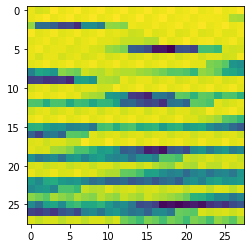

Real: 7
Predicted: 0
Rank of the correct answer: 3
Probabilities: [ 0.18949424  0.00367493  0.0971511   0.17119741  0.07102334 -0.00686296
  0.13073883  0.13292046  0.07535837  0.06502833] 

Image no. 146


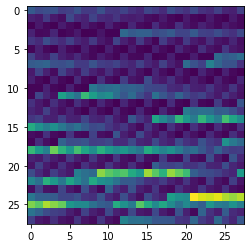

Real: 6
Predicted: 3
Rank of the correct answer: 4
Probabilities: [ 0.0335607   0.04470037  0.19193204  0.21774229  0.04650721  0.06623838
  0.1865871   0.20951622 -0.07984675  0.04259839] 

Image no. 147


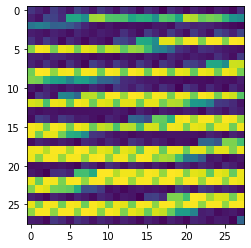

Real: 2
Predicted: 5
Rank of the correct answer: 6
Probabilities: [-0.0317606   0.01431771 -0.01050876  0.12314063 -0.05772413  0.65078889
  0.44478888 -0.02586772 -0.13343343  0.13483024] 

Image no. 148


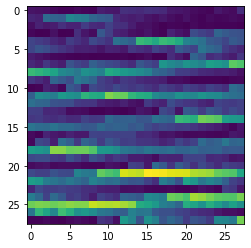

Real: 5
Predicted: 7
Rank of the correct answer: 6
Probabilities: [ 0.20322836 -0.07872838 -0.04420348  0.19741059  0.21574154  0.14070019
  0.19785982  0.40477791 -0.06637984 -0.02899493] 

Image no. 149


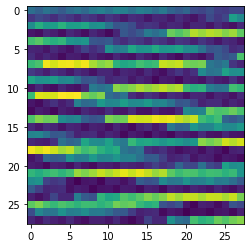

Real: 2
Predicted: 5
Rank of the correct answer: 5
Probabilities: [-0.00404297  0.07811101  0.1098777   0.19425976 -0.08732884  0.34265275
  0.02658476  0.17400375  0.00799598  0.16637775] 

Image no. 150


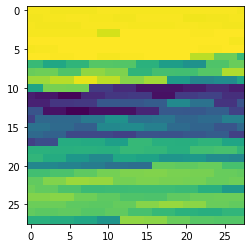

Real: 8
Predicted: 0
Rank of the correct answer: 10
Probabilities: [ 0.25076464  0.23457105  0.14891209  0.13094027  0.08124171  0.02487745
  0.03547559  0.02777631 -0.05503155  0.24450121] 

Image no. 151


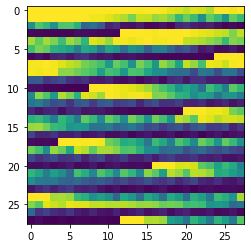

Real: 9
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.0718877   0.09811653  0.09854059  0.313428    0.03120997  0.25285347
  0.024782   -0.01533013  0.06754836  0.27114321] 

Image no. 152


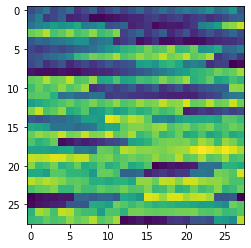

Real: 6
Predicted: 4
Rank of the correct answer: 8
Probabilities: [ 0.1175866  -0.0318893   0.07591372  0.16945561  0.17703109  0.09965156
  0.03580439  0.14290371  0.13358062  0.02979877] 

Image no. 157


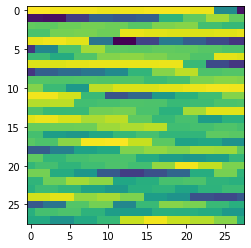

Real: 9
Predicted: 8
Rank of the correct answer: 2
Probabilities: [-0.0928952   0.29617404 -0.01771043  0.10250107  0.10407311 -0.07755848
 -0.04366999 -0.09785789  0.49718834  0.34919828] 

Image no. 158


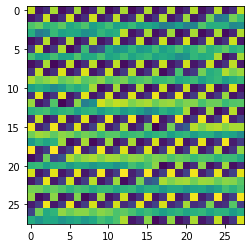

Real: 5
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.00325206  0.03249322 -0.09803397  0.35192862  0.07680757  0.25205108
  0.0991625   0.02429945  0.04859885  0.09793653] 

Image no. 159


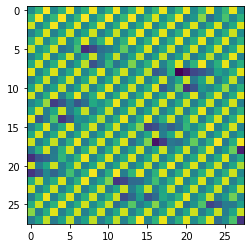

Real: 4
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.30392306 -0.04572428  0.0980567   0.05063229  0.17169639  0.0073762
 -0.07192032  0.14547258  0.12582751  0.14483051] 

Image no. 160


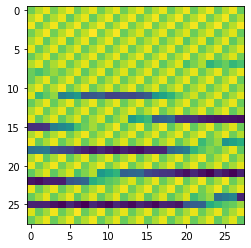

Real: 2
Predicted: 0
Rank of the correct answer: 2
Probabilities: [ 0.43832912 -0.06236601  0.301123    0.2090214   0.01547634  0.03533037
  0.065648   -0.06014417  0.03132198 -0.02363815] 

Image no. 162


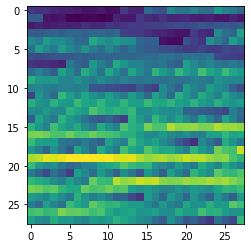

Real: 6
Predicted: 0
Rank of the correct answer: 9
Probabilities: [ 0.27340244  0.18987647  0.14152828  0.21269406  0.05069043  0.18160832
  0.04903231  0.10759425 -0.19402648  0.06368762] 

Image no. 163


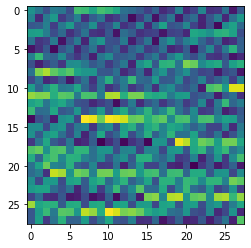

Real: 6
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.04240017 -0.18708746  0.23527402 -0.03965441  0.34866459  0.12853776
  0.30926132  0.14158061  0.00170528 -0.0147199 ] 

Image no. 164


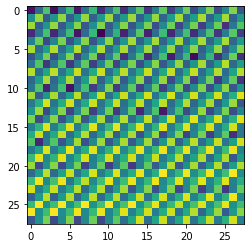

Real: 8
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.25504136 -0.05502884  0.04895211  0.10560507  0.0326993   0.09029753
 -0.07327234  0.11019753  0.1964156   0.33967858] 

Image no. 165


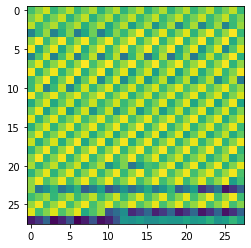

Real: 4
Predicted: 7
Rank of the correct answer: 4
Probabilities: [ 0.25434002 -0.04843751 -0.04769552 -0.04752432  0.11178838  0.00672281
  0.00466864  0.36437931  0.08875275  0.26845198] 

Image no. 171


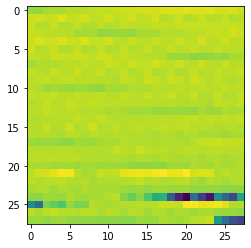

Real: 9
Predicted: 7
Rank of the correct answer: 4
Probabilities: [ 0.29585488 -0.08284308  0.10180374  0.1066364   0.11889614  0.20445887
 -0.03732025  0.37011266 -0.11093101  0.15091979] 

Image no. 172


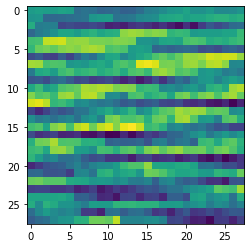

Real: 9
Predicted: 1
Rank of the correct answer: 6
Probabilities: [ 0.15421594  0.20101813  0.1651048   0.05727073  0.05371811  0.02873134
  0.09544831 -0.0126499   0.12106357  0.09200376] 

Image no. 174


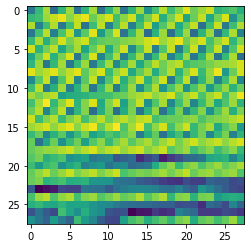

Real: 9
Predicted: 1
Rank of the correct answer: 3
Probabilities: [ 0.05516148  0.26121468  0.06433109  0.09131373  0.14850816  0.08825442
  0.06898338  0.21907793 -0.07769203  0.15304285] 

Image no. 176


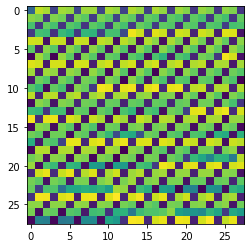

Real: 3
Predicted: 8
Rank of the correct answer: 6
Probabilities: [ 0.30054068 -0.00920375  0.00370399  0.03181331  0.09241653  0.09940265
  0.15194196 -0.00777476  0.44687263 -0.03933155] 

Image no. 177


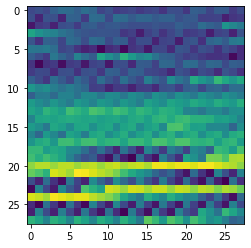

Real: 7
Predicted: 3
Rank of the correct answer: 5
Probabilities: [-0.00682808 -0.03439511  0.20547438  0.26980514  0.08544506  0.24813975
  0.22988979  0.19847209 -0.09241695 -0.13463287] 

Image no. 178


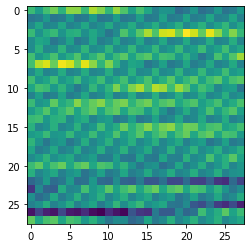

Real: 5
Predicted: 3
Rank of the correct answer: 3
Probabilities: [ 0.09110922  0.04364551  0.12102416  0.19631128  0.07913704  0.12502212
  0.05308907  0.16455965  0.09098063 -0.01875643] 

Image no. 179


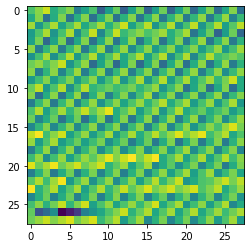

Real: 0
Predicted: 9
Rank of the correct answer: 6
Probabilities: [ 0.08582962  0.147701    0.12111896 -0.11030266  0.13251327  0.04194998
 -0.07909627  0.03376662  0.21976592  0.40613267] 

Image no. 180


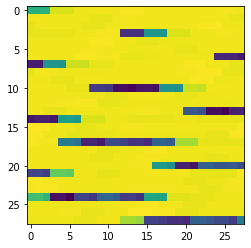

Real: 0
Predicted: 9
Rank of the correct answer: 3
Probabilities: [ 0.20848769  0.23005949 -0.11966724  0.10827096  0.00751702 -0.09924745
  0.08875237  0.14941033  0.19115294  0.36077616] 

Image no. 181


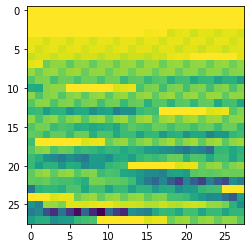

Real: 5
Predicted: 7
Rank of the correct answer: 4
Probabilities: [-0.00975574  0.13864574 -0.01728319  0.19928935  0.20726901  0.16159434
  0.08927605  0.33278517  0.02357084 -0.02389533] 

Image no. 182


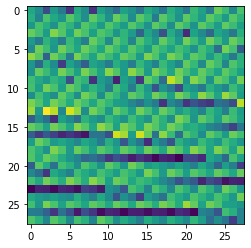

Real: 2
Predicted: 6
Rank of the correct answer: 7
Probabilities: [ 0.03212667 -0.09819691  0.07013183  0.15815041  0.11479627  0.22955971
  0.5235126   0.1328848  -0.10737491  0.07652841] 

Image no. 183


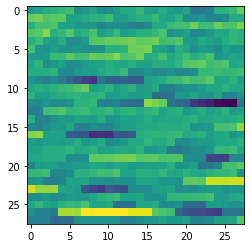

Real: 2
Predicted: 0
Rank of the correct answer: 2
Probabilities: [0.21938487 0.00860216 0.21930728 0.05990415 0.08176815 0.01283151
 0.0988442  0.04977537 0.16257404 0.02497399] 

Image no. 184


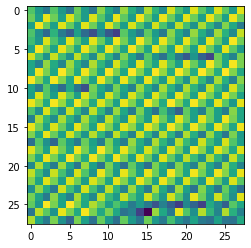

Real: 3
Predicted: 7
Rank of the correct answer: 5
Probabilities: [ 0.05338408 -0.00740581  0.18338807  0.14888128  0.06902906  0.19557479
  0.16045288  0.28743372  0.02406673 -0.13689679] 

Image no. 188


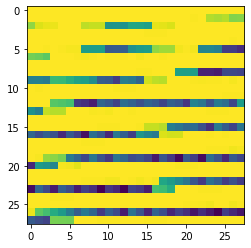

Real: 4
Predicted: 7
Rank of the correct answer: 7
Probabilities: [-0.05675369  0.01022091 -0.05598546  0.27292167 -0.01772102  0.11288832
  0.33411183  0.50529825  0.06749636 -0.02752541] 

Image no. 189


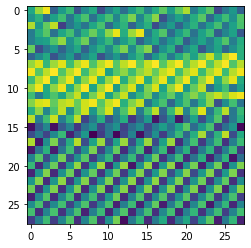

Real: 0
Predicted: 8
Rank of the correct answer: 2
Probabilities: [ 0.51384512  0.37010157  0.19973721 -0.07184041 -0.08342481 -0.13179727
 -0.05397347 -0.25418925  0.55123415 -0.12805591] 

Image no. 190


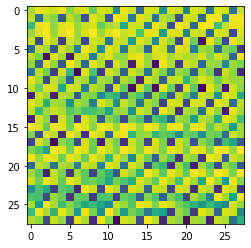

Real: 5
Predicted: 4
Rank of the correct answer: 4
Probabilities: [ 0.16804424 -0.04347619  0.27507633 -0.01635534  0.39861249  0.21223507
  0.32158512 -0.0832667   0.07857506 -0.09053559] 

Image no. 191


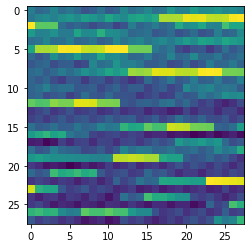

Real: 8
Predicted: 3
Rank of the correct answer: 5
Probabilities: [ 0.07629339  0.1653711   0.01627267  0.25033289  0.06753216  0.20402872
  0.14435405  0.01572237  0.12547167 -0.06541676] 

Image no. 192


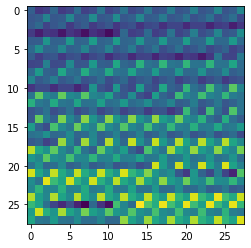

Real: 0
Predicted: 2
Rank of the correct answer: 10
Probabilities: [0.01296083 0.01669487 0.19606956 0.11320704 0.08713915 0.03139922
 0.09119465 0.19052191 0.11474836 0.11163341] 

Image no. 193


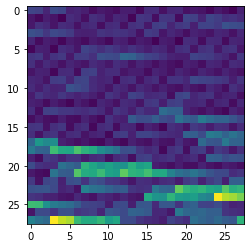

Real: 1
Predicted: 7
Rank of the correct answer: 5
Probabilities: [ 0.11587918  0.07223715 -0.04213793  0.20469351 -0.00230784  0.05690613
  0.05333274  0.28805989  0.00560322  0.08982625] 

Image no. 195


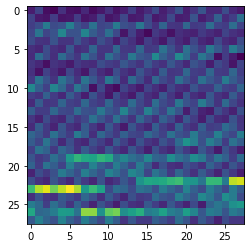

Real: 2
Predicted: 4
Rank of the correct answer: 2
Probabilities: [ 0.138939    0.10300423  0.19378669  0.11684021  0.25177741  0.01586552
  0.13285406 -0.07148666 -0.05231409  0.0642362 ] 

Image no. 197


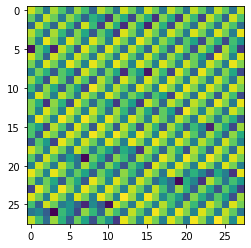

Real: 8
Predicted: 2
Rank of the correct answer: 2
Probabilities: [ 0.22896977 -0.05958719  0.27687302  0.10054315  0.1168938   0.15412955
  0.03447625  0.04462051  0.25069506 -0.05821246] 

Image no. 198


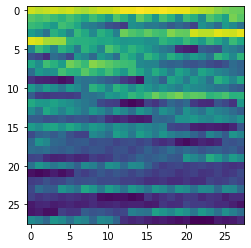

Real: 7
Predicted: 3
Rank of the correct answer: 2
Probabilities: [ 0.17584765 -0.27275964 -0.10610411  0.56670593  0.19465537  0.09774195
 -0.16586294  0.52277259  0.00970746  0.07204032] 

Image no. 199


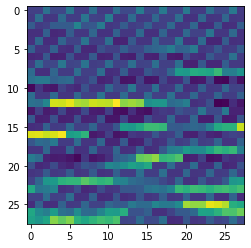

Real: 8
Predicted: 0
Rank of the correct answer: 5
Probabilities: [ 0.18934791 -0.04059905  0.0864424   0.18634509  0.12487652  0.1635809
  0.01306334  0.04594333  0.09943281  0.0665324 ] 



In [ ]:
# Devoted solely to the MNIST dataset
def find_pos(item, lst): 
    pos = [i for (z, i) in zip(lst, range(len(lst))) if item == z] 
    return pos

def display_sample(sample: np.ndarray):

    sample = np.array(sample, dtype='float')
    pixels = np.zeros((28,28))

    for i in range(28):
        for j in range(28):
            pixels[i,j] = sample[i * 28 + j]

    pixels = pixels.reshape((28, 28))
    plt.imshow(pixels, cmap='viridis')
    plt.show()

yt_estimate = np.matmul(get_h(Xt_elm, V, relu),W_elm)
for i in range(200):
    if yyt[i][np.argmax(yt_estimate[i,:])] != 1:
      print(f"Image no. {i}")
      display_sample(Xt[i])
      print(f"Real: {np.argmax(yyt[i,:])}")
      print(f"Predicted: {np.argmax(yt_estimate[i,:])}")
      value = yt_estimate[i,np.argmax(yyt[i,:])]
      v_sorted = np.sort(yt_estimate[i,:])
      value_index = find_pos(value,v_sorted)
      print(f"Rank of the correct answer: {10 - value_index[0]}")
      print(f"Probabilities: {yt_estimate[i,:]} \n")